<a href="https://colab.research.google.com/github/alfa7g7/Analisis-Cuantitativo-1er-semestre/blob/main/examen-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FACULTAD DE INGENIERÍA, DISEÑO Y CIENCIAS APLICADAS
MAESTRÍA EN CIENCIA DE DATOS
TIC 60153 – Análisis Cuantitativo
Examen 1 (50 %): Modelo de Regresión Lineal


#### Declaracion de librerías a usar

In [1]:
# Importacion de pandas y asignandole el alias pd, se usa para proceso de datos como dataframes entre otros.
import pandas as pd
# Importacion de numpy y asignandole el alias np, se usa para calculos matriciales
import numpy as np

# Importacion de seaborn y asignándole el alias sns, se usa para analisis gráfico
import seaborn as sns
# Importacion de matplotlib.pyplot y asignándole el alias plt, se usa analisis gráfico
import matplotlib.pyplot as plt

# Importacion de StandardScaler desde la libreria sklearn, se usa para estandarizar
from sklearn.preprocessing import StandardScaler
# Importacion de mean_squared_error desde la libreria sklearn, se usa para hallar el error cuadratico medio
from sklearn.metrics import mean_squared_error
# Importacion de train_test_split desde la libreria sklearn, se usa para dividir el dataframe en conjuntos test y train
from sklearn.model_selection import train_test_split

# Importacion de ttest_1samp desde la libreria scipy, se usa para calculos de test o prueba
from scipy.stats import ttest_1samp
# Importacion de ttest_1samp desde la libreria scipy, se usa para calculos estadisticos
import scipy.stats as stats

# Importacion de statsmodels y asignandole el alias sm, se usa para procesos en modelos
import statsmodels.api as sm
# Importacion de statsmodels y asignandole el alias sms, se usa para procesos de modelos
import statsmodels.stats.api as sms
# Importacion de statsmodels y asignandole el alias mad, se usa para robustecer modelos
from statsmodels.robust.scale import mad
# Importacion de lzip desde la libreria statsmodels, se usa para calculos de homocedasticidad del modelo OLS
from statsmodels.compat import lzip

### Ejercicio No. 1 - Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.
Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto (εiiid∼ N(0, σ2)).

In [ ]:
# Empezamos por leer el conjunto de datos "data1" del fichero data_exam1.xlsx
df = pd.read_excel("data_exam1.xlsx", sheet_name = 'data1')
df

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0
...,...,...,...
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0


In [ ]:
# Observamos la configuración de las variables de dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [ ]:
# Observamos los primero 5 datos (filas) del dataframe df
df.head()

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0


In [ ]:
# Observamos los ultimos 5 datos (filas) del dataframe df
df.tail()

,Y,X,Ind
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0
999,65.442984,12.692550,0


In [ ]:
# Observamos los nombres de las columnas o headers del dataframe df
df.columns

Index(['Y', 'X', 'Ind'], dtype='object')

In [ ]:
# Observamos la descripcon analitica de los datos tabulares
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


In [ ]:
# Observando si hay algún dato nulo x2da vez
df.isnull().any()

Y      False
X      False
Ind    False
dtype: bool

In [ ]:
# Determinamos el valor de correlaciones entre las variables

# correlacion de pearson
df.corr()

,Y,X,Ind
Y,1.000000,0.832057,-0.237224
X,0.832057,1.000000,0.024069
Ind,-0.237224,0.024069,1.000000


In [ ]:
# correlacion de kendall
df.corr(method = "kendall")


,Y,X,Ind
Y,1.000000,0.610515,-0.225454
X,0.610515,1.000000,0.022964
Ind,-0.225454,0.022964,1.000000


In [ ]:
# correlacion de Spearman
df.corr(method = "spearman")

,Y,X,Ind
Y,1.000000,0.803893,-0.275985
X,0.803893,1.000000,0.028111
Ind,-0.275985,0.028111,1.000000


array([[<Axes: xlabel='Y', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>,
        <Axes: xlabel='Ind', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='X'>, <Axes: xlabel='X', ylabel='X'>,
        <Axes: xlabel='Ind', ylabel='X'>],
       [<Axes: xlabel='Y', ylabel='Ind'>,
        <Axes: xlabel='X', ylabel='Ind'>,
        <Axes: xlabel='Ind', ylabel='Ind'>]], dtype=object)

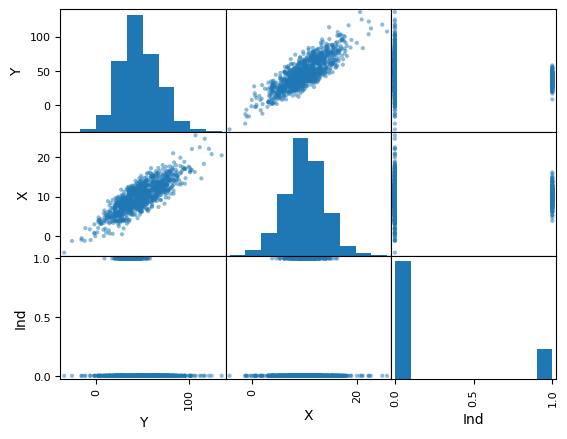

In [ ]:
# Analizamos el histograma (Observados en la diagonal) y dispersión (Observados en la anti-diagonal) para cada una de las variables del dataframe 'df'
pd.plotting.scatter_matrix(df)

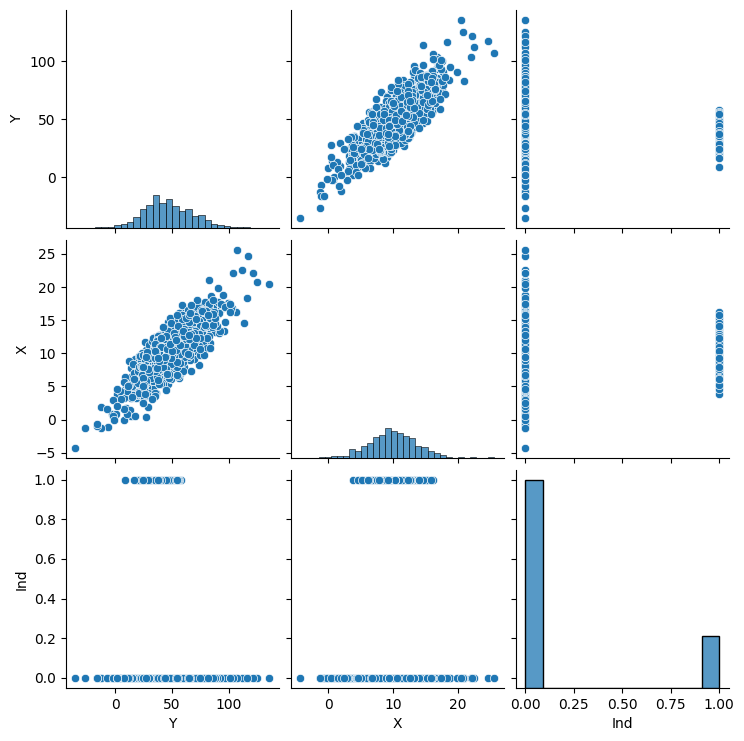

In [ ]:
# Es una gráfica igual a la interior con una mejor expresión visual
sns.pairplot(df)

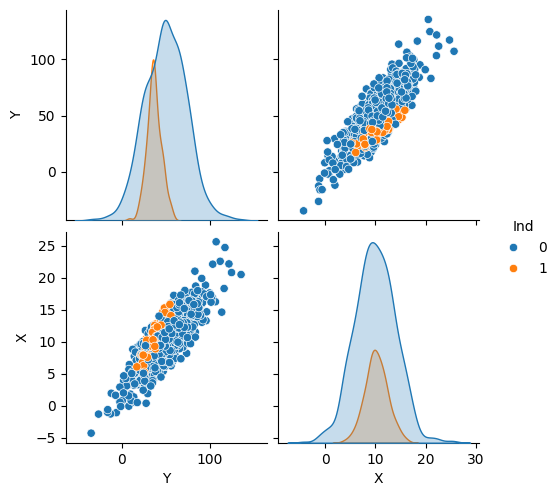

In [ ]:
# Observamos graficamente el comportamiento de las variables 'X' y 'Y' enfoncandos o usando como pista la variable categórica 'Ind'
sns.pairplot(df, hue="Ind")

Text(0, 0.5, 'Valor tomado')

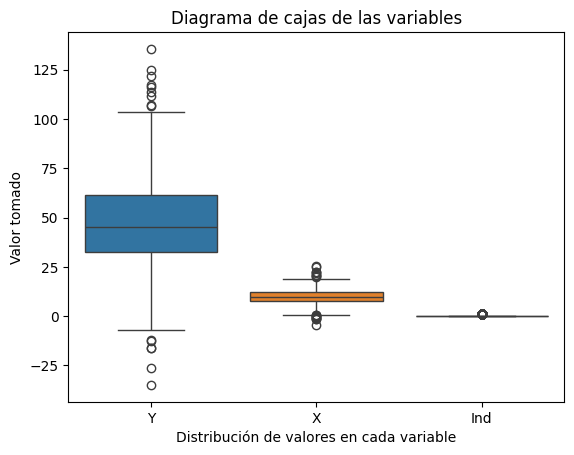

In [ ]:
# Realizamos un diagrama de cajas para observar el comportamiento de los puntos de cada variable
sns.boxplot(df)
# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas de las variables")
plt.xlabel("Distribución de valores en cada variable")
plt.ylabel("Valor tomado")

Text(0, 0.5, 'Número de veces o cantidad para cada valor tomado')

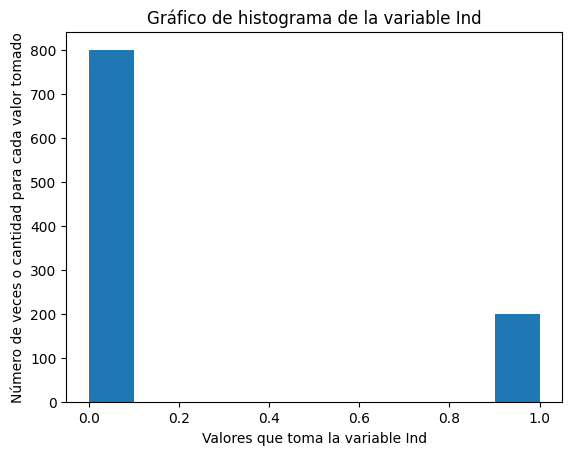

In [ ]:
# Revisamos el histograma de la varaible categórica de forma individual
plt.hist(df['Ind'])

# Agregamos títulos al gráfico y ejes
plt.title("Gráfico de histograma de la variable Ind")
plt.xlabel("Valores que toma la variable Ind")
plt.ylabel("Número de veces o cantidad para cada valor tomado")

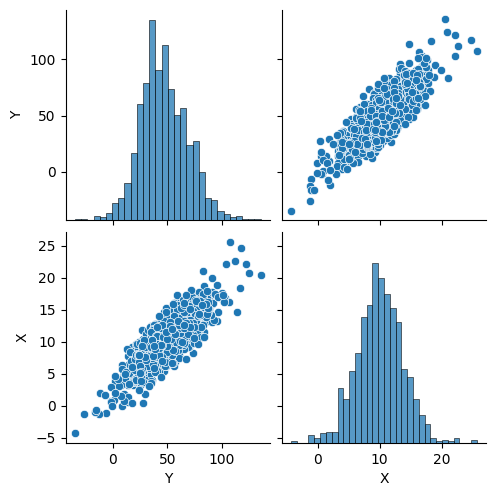

In [ ]:
# Decidimos sacar la variable categorica "Ind" y solo analizar "X" y "Y"
sns.pairplot(df.drop("Ind", axis=1))

Text(0, 0.5, 'Número de veces o cantidad')

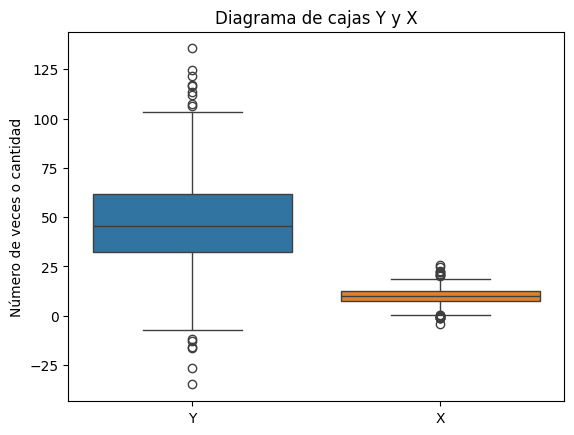

In [ ]:
# De nuevo observamos solo las 2 variables que no son categóricas
sns.boxplot(df.drop("Ind", axis=1))

# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas Y y X")
plt.ylabel("Número de veces o cantidad")

Text(0.5, 1.0, 'Diagrama de cajas X vs Ind')

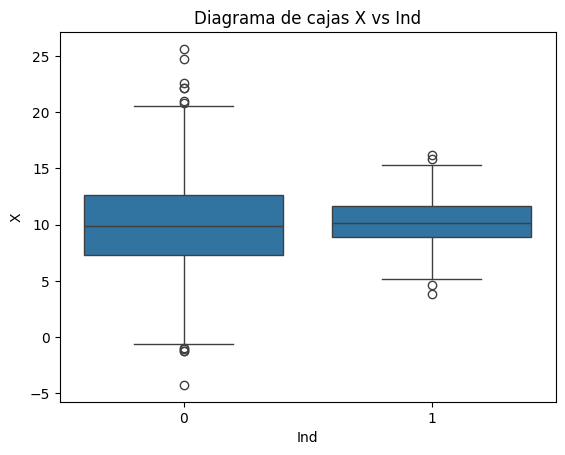

In [ ]:
# De nuevo observamos solo las 2 variables cuantitativas vs la variable categórica Ind
# Graficamos 'X' vs 'Ind'
sns.boxplot(df.drop("Y", axis=1), x=df['Ind'], y=df['X'])

# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas X vs Ind")

Text(0.5, 1.0, 'Diagrama de cajas Y vs Ind')

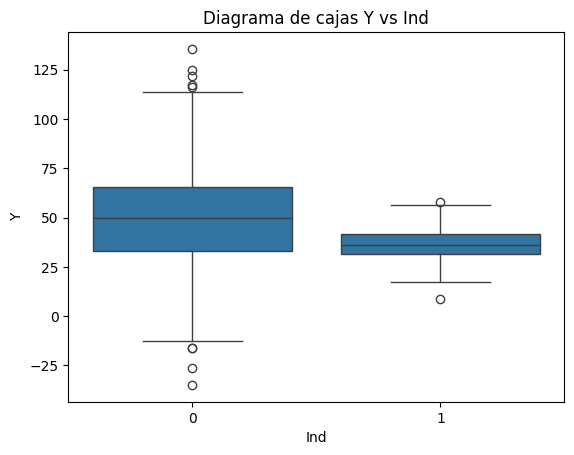

In [ ]:
# Graficamos 'Y' vs 'Ind'
sns.boxplot(df.drop("X", axis=1), x=df['Ind'], y=df['Y'])

# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas Y vs Ind")

#### Hallazgos

- El conjunto de datos tiene 1000 filas y 3 columnas

- Sus encabezados o nombres de columnas tienen el mismo orden, primera letra mayuscula; además no tienen simbolos o espacios.

- Tenemos 2 columnas con datos tipo flotantes y 1 columna con datos enteros. Adicional de los 1000 registros no contamos con ningún dato nulo o faltante.

- Tenemos una variable categórica llamada "Ind", la cual toma valores de "0" o "1" que podría indicar un valor de SI o NO, género FEMENINO o MASCULINO; pero son solo conjeturas rápidas. Adicional un 80% (800 veces) de sus datos toman el valor '0' y el 20% (200 veces) el valor '1'.

- De acuerdo a los gráficos de dispersión podemos ver que hay correlacion entre 'X' y 'Y' indicando así su dependencia lineal. Y la concentración de sus datos están más cerca de la medía de cada una como se observa en el gráfico de cajas

- Ahora si tomamos en cuenta la distribución de la variable 'Ind' respecto de 'X' y 'Y' y su valor de correlación, no podemos afirmar que tengan dependencia lineal significativa, especialmente con 'Y', ya que su 80% de valores forman o dibujan una recta con una pendiente diferente al que realizan el otro 20% com ose muestra en la gráfica. Ahora con respecto a 'X' la situación varía un poco pues pareciera que es un desplazamiento de la misma, pero de nuevo consideramos que no es significativa.

- De acuerdos a las correlaciones hechas podemos decir, que 'X' y 'Y'  presentan pendientes concordantes si se quisiera trazar una recta en tre ellas. Si analizamos 'Ind' y 'Y', podriamos decir que son discordantes pues generaría tambien una pendiente negativa en algunos puntos. Y si vemos 'X' y 'Ind' este también sería concordante con un valor tendiendo casi a cero.

¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

Consideramos que NO se puede generar un modelo de regresión lineal con la variable categórica (sin interación para la variable 'Y'. Debido que no tienen correlación y adicional gráficamente se intuye que no tienen correlaciones y podría generarse un falso positivo. Su relación no es lineal

Ahora hagamos el ejercicio de hacer el modelo y observar lo que obtenemos de toda forma para la parte académica:

In [ ]:
# Creación del modelo sin interación de la variable categórica Ind  para la variable Y
Y_modelo = df["Y"] #Variable respuesta

X_modelo = df.drop("Y", axis=1) #variables explicativas
X_modelo = sm.add_constant(X_modelo) #Variable de constante que se agrega siempre de valores 1 para la elaboracion del modelo OLS, el intercepto
# X_modelo se puede resumir en 1 sola linea: X_modelo = sm.add_constant(df.drop(´Y´, axis=1))

modelo = sm.OLS(Y_modelo, X_modelo)
resultados = modelo.fit()

print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          2.25e-308
Time:                        15:51:39   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.4

Prob (F-statistic):2.25e-308 < 0.05

Al cumplir esta condición númerica podemos concluir que el modelo nos sirve
apriori

Forma habitual de hacer el calculo de los coeficientes de regresión
$\beta = (X^\top X)^{-1} X^\top y$

In [ ]:
# Comprobación manual del calculo matricial de los betas b0, b1 y b2

#Asignamos 2 variables para el calculo X_design y Y_design
X_design = X_modelo
y_design = Y_modelo

#Calculamos por partes:
# Calculamos en la variable left_term: (X^\top X)^{-1}
left_term = np.linalg.inv(np.matmul(X_design.transpose(), X_design))
# Calculamos en la variable right_term: X^\top y$
rigth_term = np.matmul(X_design.transpose(), y_design)

betas = np.matmul(left_term, rigth_term)
print(betas)

[  0.78732709   4.91160016 -14.17957698]


#### Supuestos

In [ ]:
# 0. Media cero: Usamos un one sample t test con media en 0 para verificar justamente que los residuales esten centrados en cero
# from scipy.stats import ttest_1samp # para mirar si el modelo está centrado en cero. Para el supuesto 0

ttest_1samp(resultados.resid, 0)

#Falta la conclusion de los resultados


TtestResult(statistic=-6.106157525987408e-14, pvalue=0.9999999999999514, df=999)

In [ ]:
# 1. Normalidad: Usamos Jarque-Bera, si el p-value Prob(JB) es mayor a 0.05, no rechazo la hipotesis nula por lo tanto concluyo normalidad.
# H0: X ~ normal
# H1: X !~ normal

# Tenemos p-value Prob(JB) = 0.295
# Concluimos normalidad en el modelo resultados y está cumplido este supuesto

In [ ]:
# 2. Independencia: Usamos Durbin-Watson, si el valor DW esta entre 1.5 y 2.5 decimos que hay independencia en los errores de lo contrario,
# los errores no serian independientes.

# Durbin-Watson = 1.997
# Concluimos que hay independiencia en los errores y está cumpliendo los supuestos.

In [ ]:
# 3. Homocedasticidad: Usamos Breuschpagan test para el tema de homogeneidad de varianzas,
# Si el p_value asociado al multiplicador de lagranse es mayor a 0.05 concluimos homocedasticidad
# de lo contrario concluimos heterocedasticidad.

#Para calcular homocedasticidad
#from statsmodels.compat import lzip
#import statsmodels.stats.api as sms

names = ["lagrange-multiplier-statistic", "p-value", "f-value", "f-p-value"]
bp_test = sms.het_breuschpagan(resultados.resid, resultados.model.exog) # residuales y exogenos

lzip(names, bp_test)

# Concluimos homocedasticidad

[('lagrange-multiplier-statistic', 64.60486660135223),
 ('p-value', 9.359043491930456e-15),
 ('f-value', 34.42986268675474),
 ('f-p-value', 3.4758447737327506e-15)]

#### Interpretación del modelo "modelo"


In [ ]:
# R-squared = 0.759 = 75.9% - Adj. R-squared = 0.758 = 75.8%
# Estos dos valores nos indican en que porcentaje o valor la variable dependiente 'Y'
# puede ser predecida por las variables predictoras o independientes ('X', 'Ind'), en este caso un 75% de acierto

# beta_0 = const.coef = 0.7873 Este es el intercepto de la regresión.
# Esto quiere deicr que cuando todas las variables independientes ('X', 'Ind') son cero,
# se supone que el valor de la variable dependiente 'Y' sea más o menos 0.7873.

# beta_1 = X.coef = 4.9116
# Por cada unidad de aumento en la variable "X", suponiendo el resto de variables constantes,
# se espera que "Y" aumente 4.9116 unidades

# beta_2 = Ind.coef = -14.1796
# Por cada unidad de aumento en la variable "Ind", suponiendo el resto de variables constantes,
# se espera que "Y" aumente -14.1796 unidades




Text(0, 0.5, 'Variable Y')

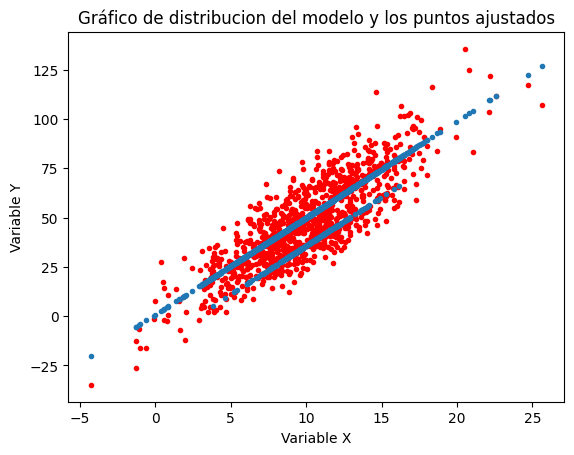

In [ ]:
# Graficando el modelo respuesta

plt.plot(X_modelo.X, Y_modelo, '.', color="red")
plt.plot(X_modelo.X, resultados.fittedvalues, '.')

# Agragamos títulos al gráfico y ejes
plt.title("Gráfico de distribucion del modelo y los puntos ajustados")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

Como se evidencia en la gráfica lo ideal sería agregar interaciones entre las variables cuantitativas 'X' y 'Y' y la variable cualitativa 'Ind' para poder llegar a un modelo que se ajuste más a lo que buscamos y no obtener así 2 diferentes tipos de respuesta que acarrearían como dijimos anteriormente un falso positivo, una interpretacción errada al final. un modelo que no sirve. Pues al ser una variable vibariante (que solo toma valores de 0 o 1) nos hace generar dos regresiones una para cada valor que ella toma y manipula en la función. En el mundo real probablemente esta vriable sería sacada del modelo por su no correlación lineal, pero para la parte académica hemos decidido dejarla ahí para observar su comportamiento.

#### Ahora iniciaremos la segunda parte de la pregunta:

Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto (εiiid∼ N(0, σ2)).

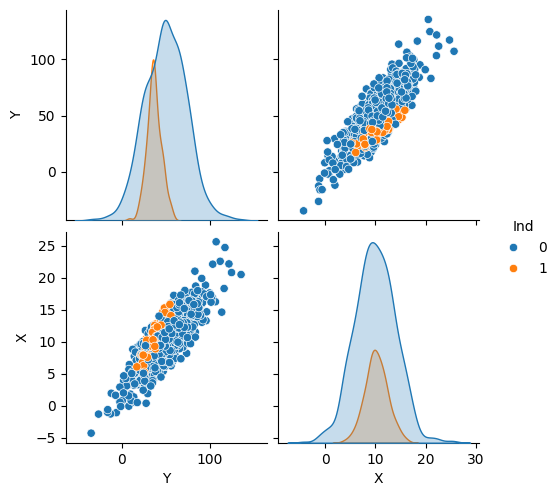

In [ ]:
# Observamos graficamente el comportamiento de las variables 'X' y 'Y' enfoncandos o usando como pista la variable categórica 'Ind'
sns.pairplot(df, hue="Ind")

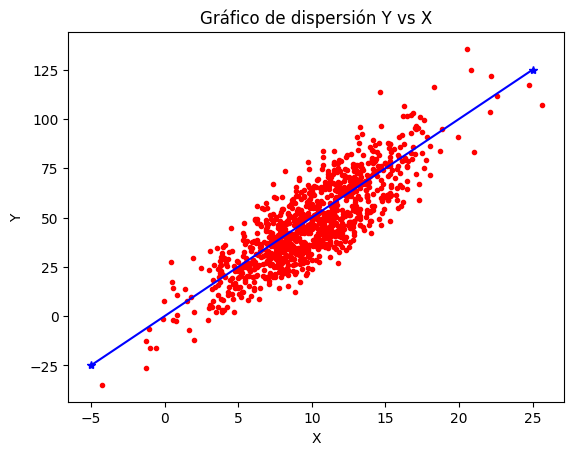

In [ ]:
# Realizamos gráfico de dispersión de las variables Y vs X
plt.plot(df.X, df.Y, '.', color="red")

# Agragamos títulos al gráfico y ejes
plt.title("Gráfico de dispersión Y vs X")
plt.xlabel("X")
plt.ylabel("Y")

# Observamos que una recta podría desribir visulamente el gráfico de dispersión creado por las 2 variables.
plt.plot([-5, 25], [-25, 125], "*", color = "blue")
plt.plot([-5, 25], [-25, 125], color = "blue")

Consideramos que la evidencia muestral nos sugiere un cambio en la tasa media de cambio de Y, condicionado a incrementos en X

Respecto a si un modelo con interacciones de las variables predictora y la variable categórica sería más adecuado tenemos 2 perspectivas:
1. Para este caso espefíco, si! debido a que esta interación ayudaría a descrbir por completo o de una mejorar manera la relación entre las variables.

2. Para la creación de un modelo que nos permita evaluar otros conjuntos de datos para este mismo campo de acción si sería lo idonéo pues nos ahorraría tiempo en proceso como el EDA y demás.

Teniendo en cuenta estas 2 observaciones concluimos que lo idóneo con el fin de predecir el comportamiento de otros componentes o elementos de la muestra que desconocemos u otros conjuntos de datos futuros del mismo sistema o area de estudio es adecuado usar un modelo con iteracciones.




In [ ]:
#Construccion del modelo con interacciones
# Hacemos un dataframe df_int donde incluimos una interaccion en una variable X2
# la cual la defineremos como el valor multiplicado de 'X' por 'Ind' creando así su interacción

df_int = df.copy()
df_int["X2"] = df_int["X"]*df_int["Ind"]

df_int.head()

,Y,X,Ind,X2
0,66.199147,12.653765,0,0.000000
1,44.311301,8.204418,0,0.000000
2,48.390783,8.768596,0,0.000000
3,58.087413,16.169568,1,16.169568
4,60.708671,9.980310,0,0.000000


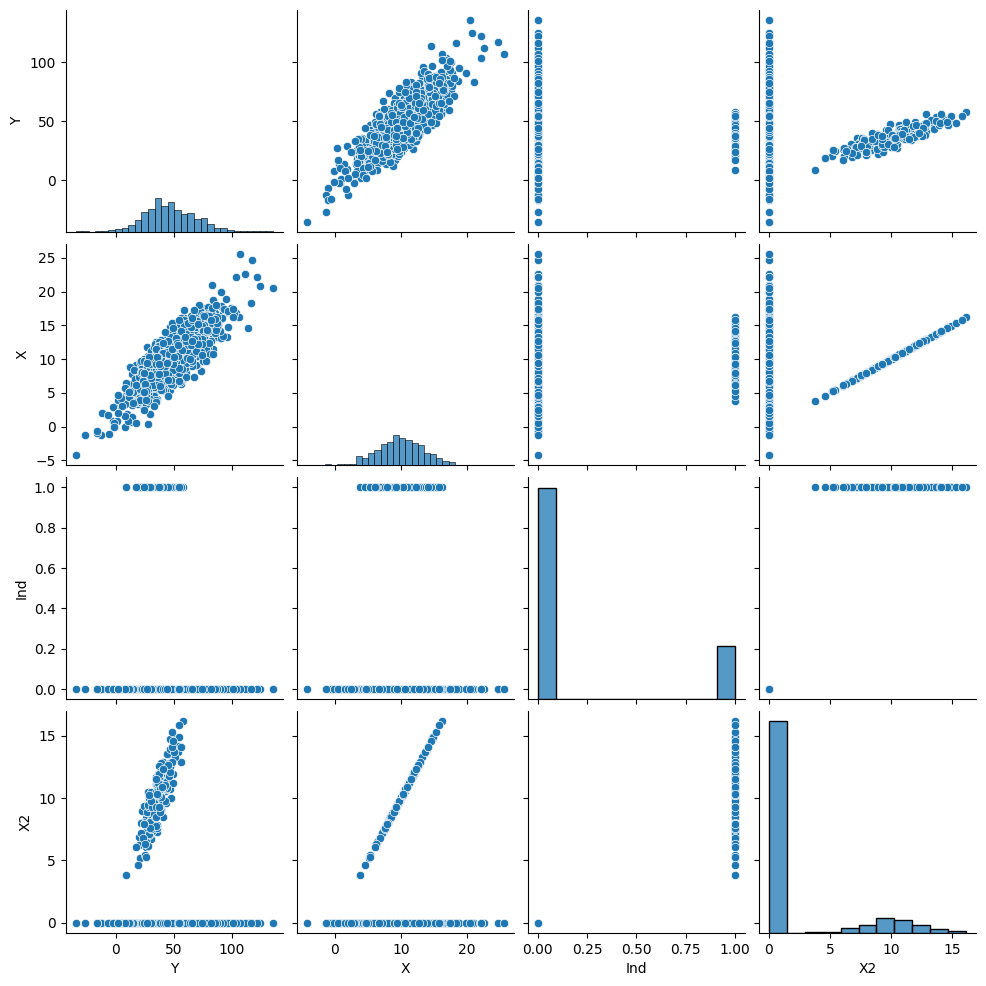

In [ ]:
# Observamos graficamente el comportamiento de las variables
sns.pairplot(df_int)

In [ ]:
# Determinamos el valor de correlaciones entre las variables

# correlacion de pearson
df_int.corr()

,Y,X,Ind,X2
Y,1.000000,0.832057,-0.237224,-0.196048
X,0.832057,1.000000,0.024069,0.086396
Ind,-0.237224,0.024069,1.000000,0.971261
X2,-0.196048,0.086396,0.971261,1.000000


In [ ]:
# correlacion de kendall
df_int.corr(method = "kendall")

,Y,X,Ind,X2
Y,1.000000,0.610515,-0.225454,-0.167944
X,0.610515,1.000000,0.022964,0.088042
Ind,-0.225454,0.022964,1.000000,0.943071
X2,-0.167944,0.088042,0.943071,1.000000


In [ ]:
# correlacion de Spearman
df_int.corr(method = "spearman")

,Y,X,Ind,X2
Y,1.000000,0.803893,-0.275985,-0.249375
X,0.803893,1.000000,0.028111,0.069607
Ind,-0.275985,0.028111,1.000000,0.991770
X2,-0.249375,0.069607,0.991770,1.000000


In [ ]:
# Modelo lineal con iteraccion
Y_modelo2 = df_int["Y"]
X_modelo2 = sm.add_constant(df_int.drop("Y", axis = 1))

modelo2 = sm.OLS(Y_modelo2, X_modelo2)
resultados2 = modelo2.fit()

print(resultados2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.34e-312
Time:                        15:51:47   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4991      1.001     -0.498      0.6

Prob (F-statistic):1.34e-312 < 0.05

Al cumplir esta condición númerica podemos concluir que el modelo nos sirve
apriori

#### Supuestos

In [ ]:
# 0. Media cero: Usamos un one sample t test con media en 0 para verificar justamente que los residuales esten centrados en cero

from scipy.stats import ttest_1samp # para mirar si el modelo está centrado en cero. Para el supuesto 0

ttest_1samp(resultados2.resid, 0)

#Falta la conclusion de los resultados

TtestResult(statistic=-5.56737193353094e-14, pvalue=0.9999999999999556, df=999)

In [ ]:
# 1. Normalidad: Usamos Jarque-Bera, si el p-value Prob(JB) es mayor a 0.05, no rechazo la hipotesis nula por lo tanto concluyo normalidad.
# H0: X ~ normal
# H1: X !~ normal

# Tenemos p-value Prob(JB) = 0.0902
# Concluimos normalidad en el modelo resultados y está cumplido este supuesto

In [ ]:
# 2. Independencia: Usamos Durbin-Watson, si el valor DW esta entre 1.5 y 2.5 decimos que hay independencia en los errores de lo contrario,
# los errores no serian independientes.

# Durbin-Watson = 1.985
# Concluimos que hay independiencia en los errores y está cumpliendo los supuestos.

In [ ]:
# 3. Homocedasticidad: Usamos Breuschpagan test para el tema de homogeneidad de varianzas,
# Si el p_value asociado al multiplicador de lagranse es mayor a 0.05 concluimos homocedasticidad
# de lo contrario concluimos heterocedasticidad.

# Para calcular homocedasticidad
# from statsmodels.compat import lzip
# import statsmodels.stats.api as sms

names2 = ["lagrange-multiplier-statistic", "p-value", "f-value", "f-p-value"]
bp_test = sms.het_breuschpagan(resultados2.resid, resultados2.model.exog) # residuales y exogenos

lzip(names, bp_test)

# Concluimos homocedasticidad

[('lagrange-multiplier-statistic', 83.04028836791721),
 ('p-value', 6.835236597869036e-18),
 ('f-value', 30.06607093901456),
 ('f-p-value', 1.3067597184142322e-18)]

#### Interpretacion del modelo "modelo2"

In [ ]:
# R-squared = 0.765 = 76.5% - Adj. R-squared = 0.764 = 76.4%
# Estos dos valores nos indican en que porcentaje o valor la variable dependiente 'Y'
# puede ser predecida por las variables predictoras o independientes ('X', 'Ind', 'X2'), en este caso un 76% de acierto

# beta_0 = const.coef = -0.4991 Este es el intercepto de la regresión.
# Esto quiere deicr que cuando todas las variables independientes ('X', 'X2', 'Ind') son cero,
# se supone que el valor de la variable dependiente 'Y' sea más o menos -0.4991.

# beta_1 = X.coef = 5.0411
# Por cada unidad de aumento en la variable "X", suponiendo el resto de variables constantes,
# se espera que "Y" aumente 5.0411 unidades

# beta_2 = Ind.coef = 4.5491
# Por cada unidad de aumento en la variable "Ind", suponiendo el resto de variables constantes,
# se espera que "Y" aumente 4.5491 unidades

# beta_3 = X2.coef = -1.8466
# Por cada unidad de aumento en la variable "X2", suponiendo el resto de variables constantes,
# se espera que "Y" aumente -1.8466 unidades

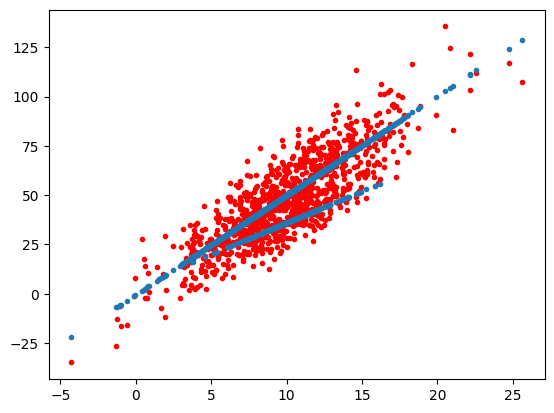

In [ ]:
# Graficando el modelo respuesta

plt.plot(X_modelo2.X, Y_modelo2, '.', color="red")
plt.plot(X_modelo2.X, resultados2.fittedvalues, '.')

Al tener interacción su comportamiento visual en la gráfica cambia y se puede intuir que en algun punto se interceptan las gráficas de rectas resulantes del modelado lo cual no indican que la interacción mejoró, si se conservaran dos rectas paralelas coomo en el modelo sin interacción pues no habríamos hecho nada que significara una mejora.
Aquí también nos planteamos que adicionalmente podríamos sacar esta variable en el mundo real en un comentario muy a grosso modo sin tener idea del dominio del conjunto de datos.

### Ejercicio No. 2 - Considere el conjunto de datos “data2” del fichero data_exam1.xlsx

Realice un análisis exploratorio de datos, tanto univariante como bivariante ¿Qué puede decir acerca del comportamiento distribucional de cada variable? ¿Considera que la dispersión bi-variante da indicios para generar un modelo de regresión para Y? Justifique detalladamente.

De acuerdo al análisis del ítem anterior proponga una transformación (raiz, potencia, logarítmica, sinusoidal, etc.) para alguna de las variables y justifique por qué. Dado lo anterior, proponga un modelo de regresión lineal, interpretelo y valide los supuestos del modeloo: (εiiid∼ N(0, σ2)).

In [ ]:
#Empezamos por leer el conjunto de datos "data2" del fichero data_exam1.xlsx
df2 = pd.read_excel("data_exam1.xlsx", sheet_name = 'data2')
df2

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573
...,...,...
995,10.283153,0.053585
996,-5.006186,0.000002
997,13.845597,0.073044
998,14.012956,0.085079


In [ ]:
# Observamos la configuración de las variables de dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
# observamos los primero 5 datos (filas) del dataframe df
df2.head()

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573


In [ ]:
# Observamos los ultimos 5 datos (filas) del dataframe df
df2.tail()

,Y,X
995,10.283153,0.053585
996,-5.006186,0.000002
997,13.845597,0.073044
998,14.012956,0.085079
999,11.521064,0.108597


In [ ]:
# Observamos los nombres de las columnas o headers del dataframe df
df2.columns

Index(['Y', 'X'], dtype='object')

In [ ]:
# Observamos la descripcon analitica de los datos tabulares
df2.describe()

,Y,X
count,1000.000000,1.000000e+03
mean,9.445622,7.234805e-02
std,3.908189,9.753985e-02
min,-12.073239,1.343729e-08
25%,7.411486,8.450417e-03
50%,10.072134,3.655172e-02
75%,12.082546,9.992523e-02
max,17.838788,9.397465e-01


In [ ]:
# Observando si hay algún dato nulo x2da vez
df2.isnull().any()

Y    False
X    False
dtype: bool

(array([733., 171.,  52.,  24.,  11.,   6.,   0.,   0.,   2.,   1.]),
 array([1.34372911e-08, 9.39746626e-02, 1.87949312e-01, 2.81923961e-01,
        3.75898610e-01, 4.69873259e-01, 5.63847908e-01, 6.57822558e-01,
        7.51797207e-01, 8.45771856e-01, 9.39746505e-01]),
 <BarContainer object of 10 artists>)

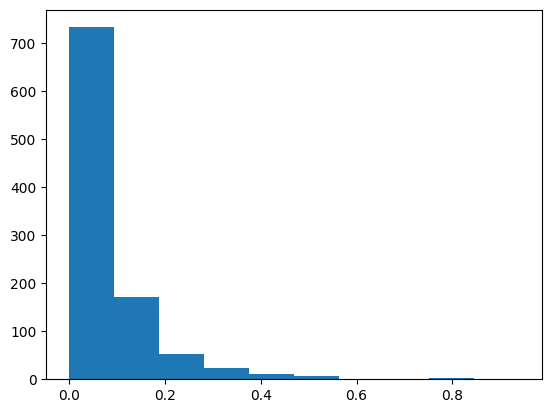

In [ ]:
# analizamos el histograma y dispersión para cada una de las variables del dataframe iniciamos por X
# Histograma de la variable X del dataframe df2
plt.hist(df2.X)

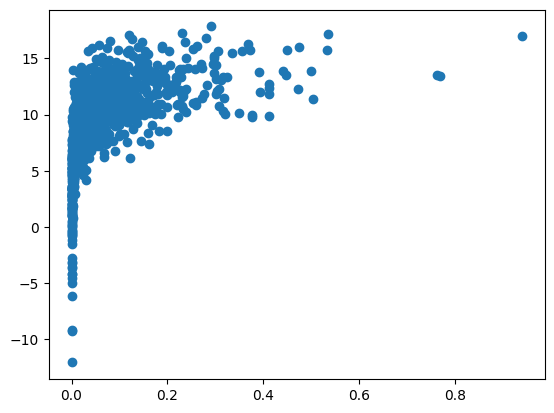

In [ ]:
# Diagrama de dispersion de la variable X del dataframe df2
plt.scatter(df2.X, df2.Y)

(array([  3.,   1.,   8.,  10.,  42.,  80., 227., 351., 233.,  45.]),
 array([-12.07323856,  -9.08203587,  -6.09083318,  -3.09963048,
         -0.10842779,   2.8827749 ,   5.8739776 ,   8.86518029,
         11.85638298,  14.84758567,  17.83878837]),
 <BarContainer object of 10 artists>)

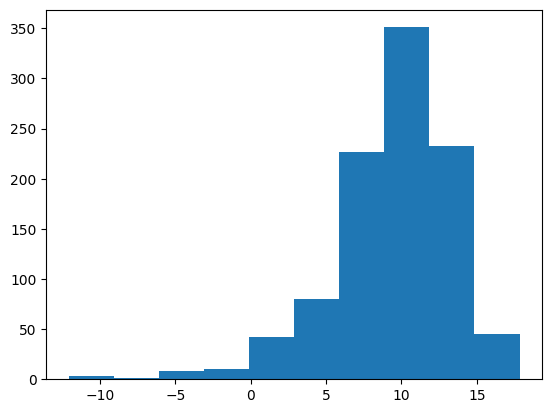

In [ ]:
# Histograma de la variable X del dataframe df2
plt.hist(df2.Y)

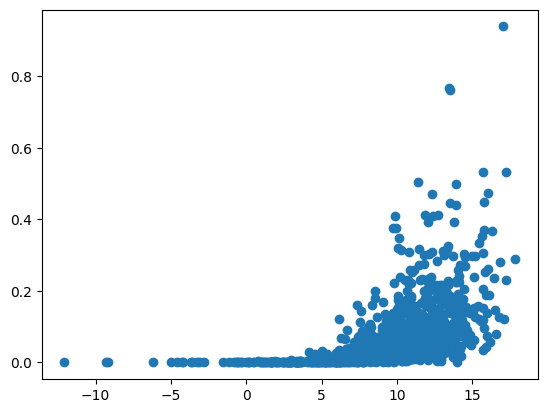

In [ ]:
# Diagrama de dispersion de la variable X del dataframe df2
plt.scatter(df2.Y, df2.X)

array([[<Axes: xlabel='Y', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='X'>, <Axes: xlabel='X', ylabel='X'>]],
      dtype=object)

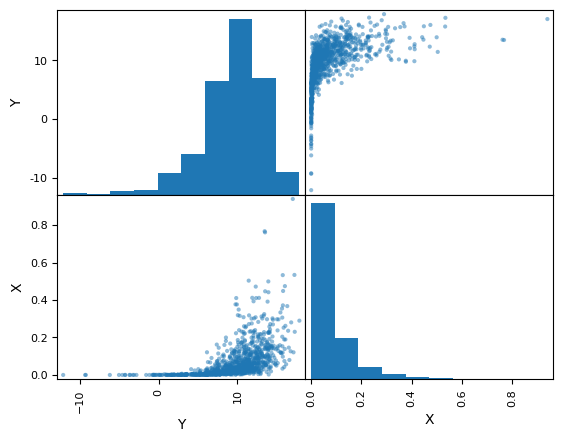

In [ ]:
pd.plotting.scatter_matrix(df2)

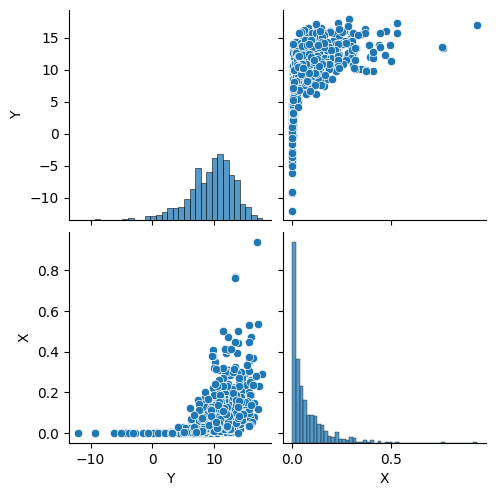

In [ ]:
# es una gráfica igual a la interior con una mejor expresión gráfica
sns.pairplot(df2)

<Axes: >

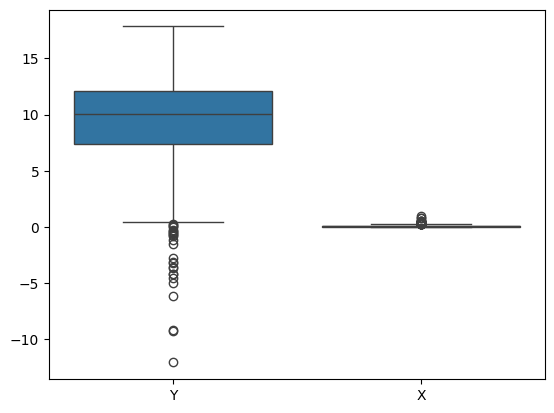

In [ ]:
# Realizamos un diagrama de cajas para observar el comportamiento de los puntos de cada variable
sns.boxplot(df2)

#### Hallazgos
- El conjunto de datos tiene 1000 filas y 2 columnas

- Sus encabezados o nombres de columnas tienen el mismo orden, primera letra mayuscula; además no tienen simbolos o espacios.

- Tenemos 2 columnas con datos tipo flotantes. Adicional de los 1000 registros no contamos con ningún dato nulo o faltante.

- De acuerdo a los gráficos de dispersión podemos ver que hay no hay una correlacion clara entre 'X' y 'Y', la dispersiones de las variables son concentradas perpendicularmente opouestas o espejo la una de la otra. Con esto si tratamos de darle sentido no sería una relación lienal pues no obtendriamos un elipse, en cambio iríamos más hacía un circulo.

Realice un análisis exploratorio de datos, tanto univariante como bivariante ¿Qué puede decir acerca del comportamiento distribucional de cada variable? ¿Considera que la dispersión bi-variante da indicios para generar un modelo de regresión para Y? Justifique detalladamente.

Cada variable se distribuye de forma perpendicularmente opuesta

Esta dispersión bi-variante así como no está no muestra relación lineal significativa o importante para desarrollar un modelo de regresión para Y, puesto que si observamos su distribución en conjunto la figura o forma que podemos asemejar o crear mentalmente no es de forma eliptica.

Ahora bien haciendo alguna transformación podriamos acomodarla y de ahí si obtener una relación lineal que se asemejaría a la ya menciona forma de elipse.

### Ejercicio No. 3 - Considere el conjunto de datos “Wine Quality” del fichero datos.xls.

Defina como variable respuesta (Y) la columna Densidad y elimine las variables pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija y Calidad de Vino.



In [2]:
# Lectura del conjunto de datos
df = pd.read_excel('/content/datos.xls', sheet_name = 'Wine Quality', decimal = ',', header=2)
#Observamos la configuracion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Calidad del Vino         4898 non-null   int64  
 1   Acidez Fija              4898 non-null   float64
 2   Acidez Volátil           4898 non-null   float64
 3   Ácido Cítrico            4898 non-null   float64
 4   Azúcar Residual          4898 non-null   float64
 5   Cloruros                 4898 non-null   float64
 6   Dióxido de Azúfre Libre  4898 non-null   float64
 7   Dióxido de Azúfre Total  4898 non-null   float64
 8   Densidad                 4898 non-null   float64
 9   pH                       4898 non-null   float64
 10  Sulfatos                 4898 non-null   float64
 11  Alcohol                  4898 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
# Observamos sus encabezados y primeros 5 regsitros, se verifica la organización de los datos
df.head()

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [4]:
# Verificamos sus columnas y su sintaxis para proceder posterior a elimnar las que nos solicitan
df.columns

Index(['Calidad del Vino', 'Acidez Fija', 'Acidez Volátil', 'Ácido Cítrico',
       'Azúcar Residual', 'Cloruros', 'Dióxido de Azúfre Libre',
       'Dióxido de Azúfre Total', 'Densidad', 'pH', 'Sulfatos', 'Alcohol'],
      dtype='object')

In [5]:
#Se eliminan las columnas de datos indicadas y se especifica que los cambios sean realizados sobre el dataframe original
cols = ['pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino']
df.drop(cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ácido Cítrico            4898 non-null   float64
 1   Azúcar Residual          4898 non-null   float64
 2   Dióxido de Azúfre Libre  4898 non-null   float64
 3   Dióxido de Azúfre Total  4898 non-null   float64
 4   Densidad                 4898 non-null   float64
 5   Alcohol                  4898 non-null   float64
dtypes: float64(6)
memory usage: 229.7 KB


#### Estandarización de las variables y división de datos

In [6]:
# Selección de variables dependiente (Densidad) e independientes
Y = df['Densidad']
X = df.drop('Densidad',axis=1)

In [7]:
#División de datos de entrenamiento y de prueba segun la ponderación 80-20 respectivamente
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [8]:
# Esta linea instancia la clase que va a calcular la estandarización
scalerX = StandardScaler()
# Ajustamos el scaler a los datos de entrenamiento
scalerX.fit(X_train)
# Se realiza la transformación
datosX_scaled = scalerX.transform(X_train)
dfX_scaled = pd.DataFrame(datosX_scaled, columns = X_train.columns)

# Esta linea instancia la clase que va a calcular la estandarización
scalerY = StandardScaler()
# Ajustamos el scaler a los datos de entrenamiento en Y
scalerY.fit(y_train.values.reshape(-1,1))
# Así calculo la estandarización de los datos
dfY_scaled = scalerY.transform(y_train.values.reshape(-1,1))

In [12]:
# Se deja en la primera columna del dataframe a la variable dependiente
df_scaled = dfX_scaled.copy()
# Cambia la dimensión de 'Densidad' en forma de columna
df_scaled['Densidad'] = dfY_scaled.reshape(1, -1)[0]

In [13]:
dfX_scaled

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Alcohol
0,0.227731,0.340419,0.534065,-0.641932,1.540371
1,0.895832,1.002071,0.773947,1.355106,-0.821712
2,-0.022807,0.184737,-0.605377,-1.022320,0.481506
3,0.144218,-0.924503,-0.125612,-0.879675,0.237153
4,-0.607396,2.432407,0.054300,0.855846,-0.088652
...,...,...,...,...,...
3913,1.563933,0.009594,-0.425465,-0.356641,-0.495907
3914,-0.106320,0.496102,1.133771,0.071295,-0.903163
3915,1.563933,-0.632598,-0.425465,0.332812,0.725860
3916,-0.356858,1.410739,1.073800,-0.095124,0.074251


In [14]:
df_scaled.head()

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Alcohol,Densidad
0,0.227731,0.340419,0.534065,-0.641932,1.540371,-0.447041
1,0.895832,1.002071,0.773947,1.355106,-0.821712,0.903370
2,-0.022807,0.184737,-0.605377,-1.022320,0.481506,-0.460280
3,0.144218,-0.924503,-0.125612,-0.879675,0.237153,-0.304718
4,-0.607396,2.432407,0.054300,0.855846,-0.088652,1.883079


In [16]:
# Se realiza el cambio de columnas
cols = df_scaled.columns.tolist()
cols[5],cols[0] = cols[0],cols[5]
df_est = df_scaled[cols]
df_est.head()

,Densidad,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Alcohol,Ácido Cítrico
0,-0.447041,0.340419,0.534065,-0.641932,1.540371,0.227731
1,0.903370,1.002071,0.773947,1.355106,-0.821712,0.895832
2,-0.460280,0.184737,-0.605377,-1.022320,0.481506,-0.022807
3,-0.304718,-0.924503,-0.125612,-0.879675,0.237153,0.144218
4,1.883079,2.432407,0.054300,0.855846,-0.088652,-0.607396


#### Matrices de Correlación

A continuación se realiza tres mapas de calor para representar las matrices de correlación de Pearson,Spearman y Kendall de una forma que sea más facil identificar las relaciones lineales debiles, moderadas y perfectas

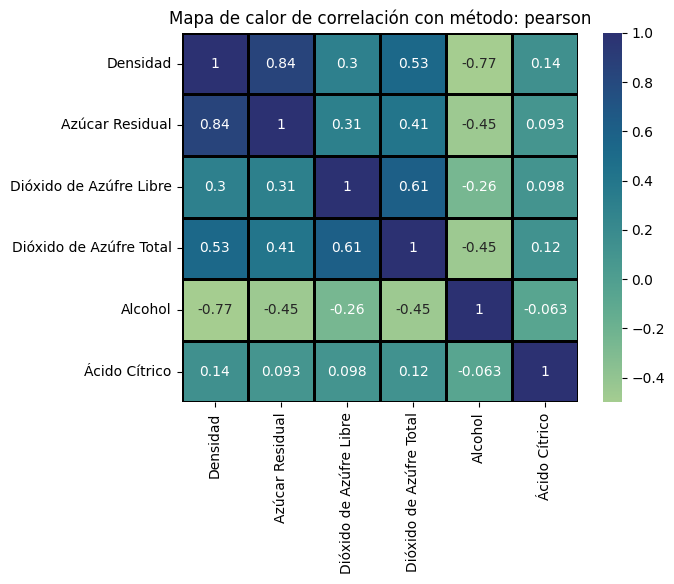

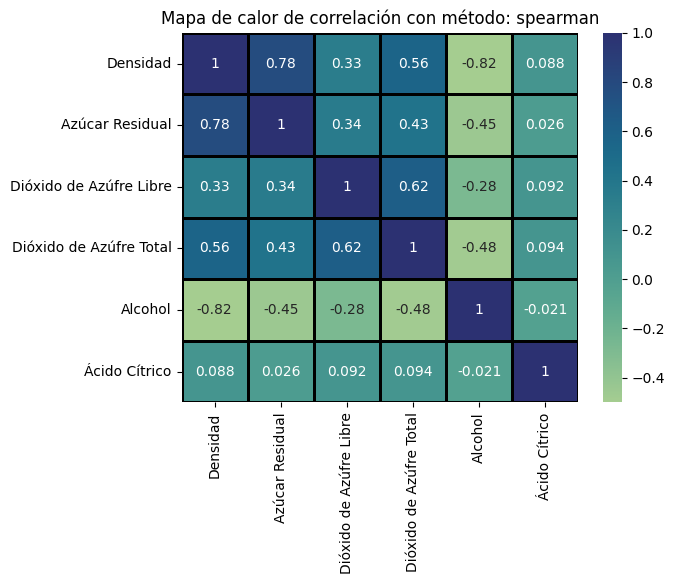

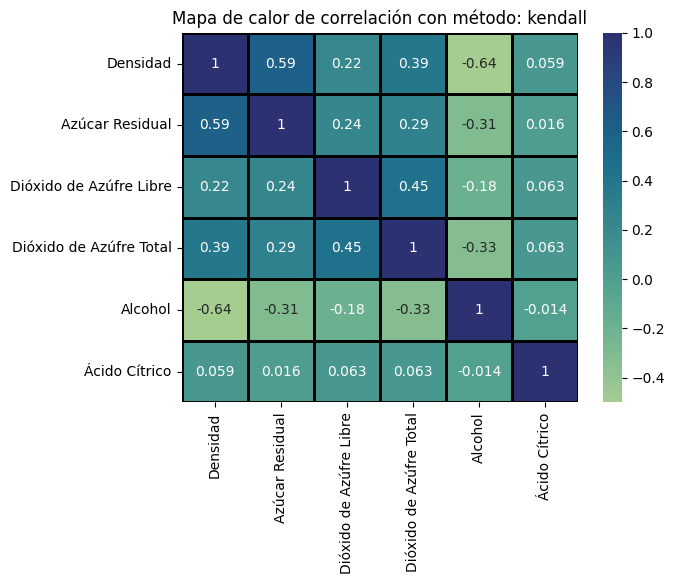

In [17]:
# Construcción de ciclo que tiene como fin mostrar los tres diferentes tipos de correlación a través de un mapa de calor
methods = ['pearson','spearman','kendall']

for method in methods:
  plt.title(f'Mapa de calor de correlación con método: {method}')
  # Se establecen parametros de visualización como el color de la linea , grosor de linea
  # y rangos en los cuales los colores cambian de intensidad
  sns.heatmap(df_est.corr(method=method),annot=True,cmap='crest',linewidths=2,linecolor='black',
              vmin=-0.5,vmax=1,cbar=True)
  plt.show()

#### ¿Qué diferencia encuentra entre las estructuras de dependencias obtenida?

En primer lugar, la diferencia más notoria es con la matriz de correlación de Pearson tiene relaciones de dependencia más altas en comparación con las matrices de Spearman y Kendall, esto en parte se debe que puede estar captando falsas relaciones lineales por atípicos multivariantes y univariantes.

La matriz de Kendall subestimó las relaciones que habían entre las variables y esto se debe a su naturaleza no parámetrica y que no hace supuestos sobre los datos.

Para hacer un analisis más detallado se va a hacer uso del siguiente grupo de graficas realizado con Seaborn para entender visualmente las relaciones entre variables y compararlas con las estimaciones según su comportamiento.

#### Relaciones a analizar

El siguiente análisis se hará sobre las variables de entrada con respecto a la de salida ('Densidad')

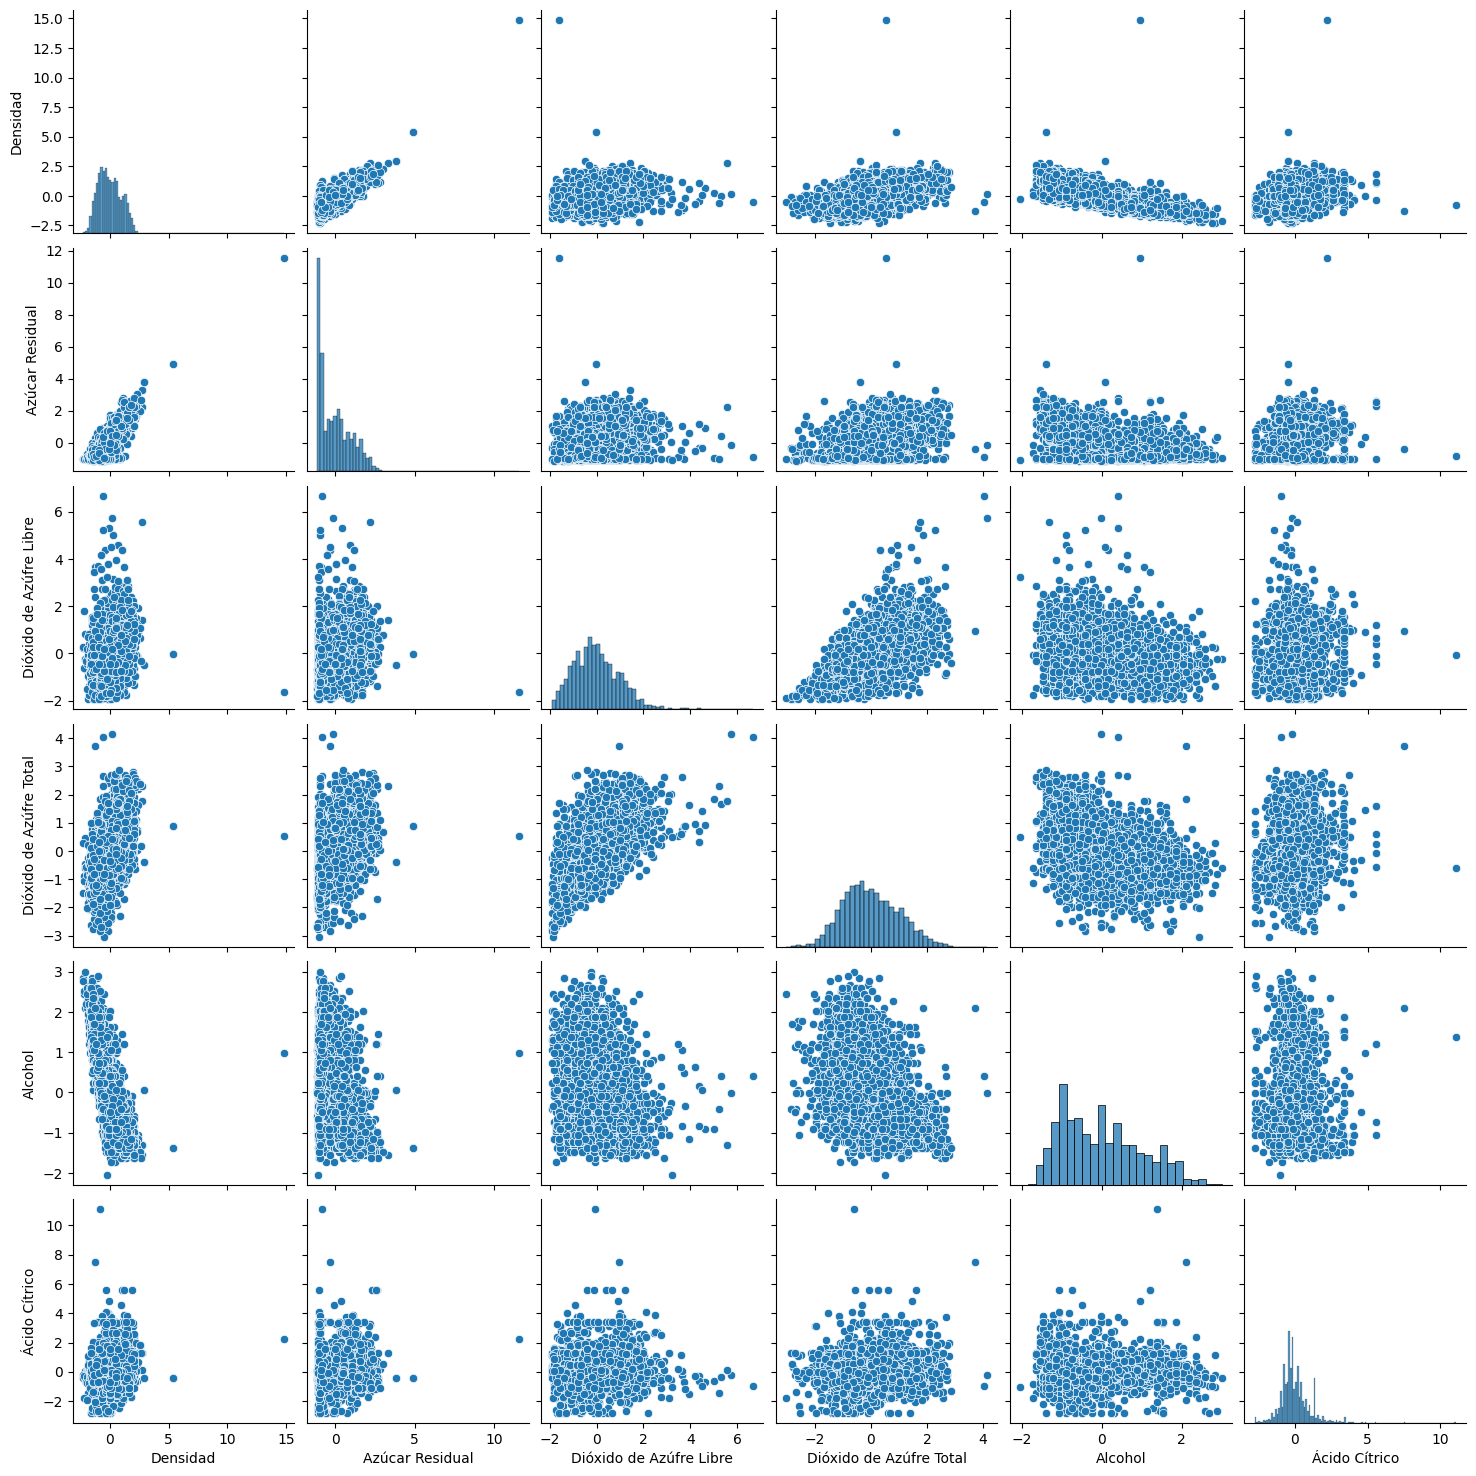

In [18]:
#Se realiza la visualización de la matriz de gráficas de dispersión para apoyar el analisis de las matrices de correlación
sns.pairplot(df_est)

In [21]:
def anomalias(x, y):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6),
    gridspec_kw={'height_ratios': [3, 1], 'width_ratios': [1, 3]})

    # Boxplot en el eje superior
    ax1.boxplot(y, vert=True)

    # Diagrama de dispersión
    ax2.scatter(x, y, s=5)

    # Boxplot en el eje inferior
    ax4.boxplot(x, vert=False)

    # Ocultar ejes
    ax3.axis('off')
    ax1.axis('off')
    ax4.axis('off')

    # Ajustar el espacio entre los subgráficos
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()

def graficar(df_est,var,n_delete=False,method='pearson'):
  print(f'{var}')
  prov = df_est[[var,'Densidad']]
  prov = prov.sort_values(by=var)

  if n_delete is False:
    prov = prov.iloc[:,:]
    anomalias(prov[var],prov['Densidad'])
  else:
    n_delete = n_delete*-1
    prov = prov.iloc[:n_delete,:]
    anomalias(prov[var],prov['Densidad'])


  print(prov.corr(method))
  print('')
  print(f'El ultimo dato de la variable {var} es: {prov[var].iloc[-1]}')

In [27]:
# Establecemos variables a analizar en var
var = df_est.drop('Densidad',axis=1).columns

##### Azucar residual VS Densidad

Según la matriz de correlación de Pearson se evidencia que la variable "Azucar residual" es la variable que representa mayor correlación con respecto a la variable de respuesta "Densidad" siendo esta un valor de 0.84 (Correlación fuerte), se espera que esta variable tenga un coeficiente de mayor impacto dentro de la ecuación de regresión lineal estimada a partir de la ecuación de correlación

Se puede visualizar en la siguiente gráfica que hay una relación lineal moderada-fuerte, alta varianza en los valores más bajos de la variable "Azucar" con respecto a la variable de respuesta y se presentan atípicos bivariantes, siendo uno de ellos extremo, de tal manera que si se extrae disminuye un punto porcentual en las siguientes lineas de codigo. Cuando se extraen los siguientes datos atipicos no hay variación significativa debido a que no son extremos ni tampoco son una gran densidad de puntos por lo tanto Pearson no fue tan afectada por estas anomalías

Azúcar Residual


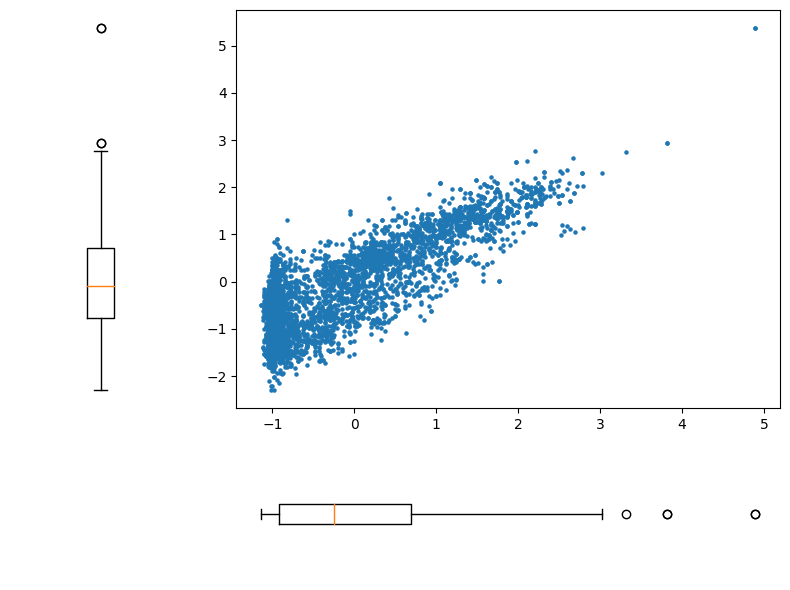

                 Azúcar Residual  Densidad
Azúcar Residual         1.000000  0.837146
Densidad                0.837146  1.000000

El ultimo dato de la variable Azúcar Residual es: 4.894140496538503


In [28]:
graficar(df_est,var=var[0],n_delete=1)

##### Dióxido de azufre libre VS Densidad

Graficamente se puede visualizar hay relación debil, se logra pronunciar una relación eliptica pero esta se encuentra de forma casi horizontal lo que indica que el cambio en la variable "Dióxido de azufre libre" no tiene tanto impacto como la variable "Azucar Residual" y por ello es la segunda variable con menos correlación dentro de las tres matrices de correlación con respecto a la variable de respuesta donde se obtuvieron los siguientes valores Spearman: 0.3, Pearson: 0.33 (Es posible que se haya captado relaciones no lineales) y Kendall: 0.22 que naturalmente tiende a subestimar las correlaciones.

Se presentan una gran cantidad de atipicos sobre la variable de entrada pero estos siguen con la tendencia de los datos así que no afecta en gran medida el calculo de las correlaciones.

Dióxido de Azúfre Libre


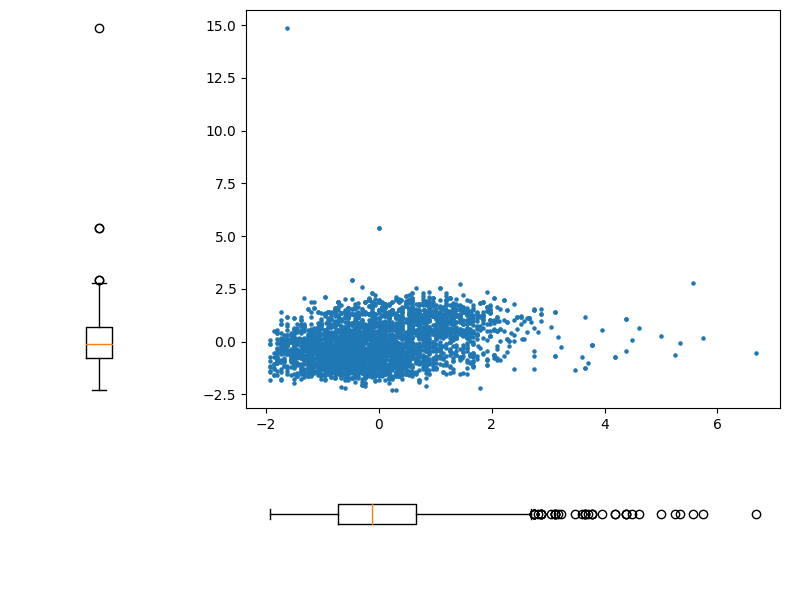

                         Dióxido de Azúfre Libre  Densidad
Dióxido de Azúfre Libre                 1.000000  0.299829
Densidad                                0.299829  1.000000

El ultimo dato de la variable Dióxido de Azúfre Libre es: 6.681053842118569


In [24]:
graficar(df_est,var=var[1],n_delete=False)

##### Dióxido de azufre libre VS Densidad

Según las matrices de correlación calculadas se evidencia que el Dióxido de azufre libre tiene una relación moderada con la variable de respues según Pearson y Spearman con valores de 0.53 y 0.56 respectivamente, mientras que Kendall subestimó nuevamente la correlación con un valor de 0.39 siendo considerada como una relación debil

Gráficamente se observa un comportamiento eliptico con baja varianza pero nuevamente un poco inclinada horizontalmente, por lo tanto el cambio de la variable de entrada con la de salida es de moderado efecto.

In [ ]:
pearson = df_est.corr(method='pearson')
spearman = df_est.corr(method='spearman')
kendall = df_est.corr(method='kendall')

Realice una partición de los datos tipo 80–20, donde el primer 80 % de los datos es
una muestra de entrenamiento y el restante 20 % una muestra de prueba/predicción.
Luego, construya 3 modelos RLM con las matrices estimadas en el primer ítem

βˆ
(·) = ρˆ
−1
(·)XXρˆ(·)XY

βˆ
0(·) = µˆY − µˆXβˆ
(·)

In [ ]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Se organiza la matriz de tal forma de que la variable independiente (Densidad) esté en la primer columna

cols = df_est.columns.tolist()
cols[4],cols[0] = cols[0],cols[4]

In [ ]:
df_est = df_est[cols]

In [ ]:
# Calculando las desviaciones estandar de forma robusta
from statsmodels.robust.scale import mad

def robust(df,method):

  desvest = mad(df)
  corr = df.corr(method=method)
  Sigma = np.matmul(np.matmul(np.diag(desvest),corr),np.diag(desvest))
  Sigma = Sigma.to_numpy()

  Sxx = Sigma[1:,1:]
  Sxy = Sigma[1:,0]

  betas = np.matmul(np.linalg.inv(Sxx),Sxy)

  Y = df['Densidad']
  X = df.drop('Densidad',axis=1)

  y_bar = Y.median()
  x_bar = X.median()

  beta0 = y_bar - np.matmul(x_bar.to_numpy(),betas)

  return betas, beta0

In [ ]:
df_est

,Densidad,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Ácido Cítrico,Alcohol
0,2.331512,2.821349,0.569932,0.744565,0.213280,-1.393152
1,-0.009154,-0.944765,-1.253019,-0.149685,0.048001,-0.824276
2,0.358665,0.100282,-0.312141,-0.973336,0.543838,-0.336667
3,0.525855,0.415768,0.687541,1.121091,-0.117278,-0.499203
4,0.525855,0.415768,0.687541,1.121091,-0.117278,-0.499203
...,...,...,...,...,...,...
4893,-0.965483,-0.944765,-0.664970,-1.091000,-0.365197,0.557282
4894,0.291789,0.317179,1.275590,0.697499,0.213280,-0.743008
4895,-0.497350,-1.023637,-0.312141,-0.643875,-1.191592,-0.905544
4896,-1.784717,-1.043355,-0.900190,-0.667408,-0.282557,1.857572


In [ ]:
betas_pearson,beta0_p = robust(df_est,methods[0])
betas_spearman,beta0_s = robust(df_est,methods[1])
betas_kendall,beta0_k = robust(df_est,methods[2])

betas_ceros = pd.DataFrame([beta0_p,beta0_s,beta0_k])

In [ ]:
betas_ceros

,0
0,0.021190
1,-0.005796
2,-0.018966


In [ ]:
#Ingresar b0 a la matriz de betas
betas = pd.DataFrame([betas_pearson,betas_spearman,betas_kendall])
betas.insert(0,'0',betas_ceros)
betas = betas.T
betas.reset_index(inplace = True, drop = True)
betas.columns = ['betas_pearson','betas_spearman','betas_kendall']
# betas['variable ind'] = df_est.iloc[:,1:].columns

In [ ]:
import statsmodels.api as sm
def preds(betas, df):

    x = df.values

    # Agregar una columna de unos para representar el término de intercepción
    x_intercept = sm.add_constant(x)
    betas_array = np.array(betas)

    # Suma producto entre betas y los valores de las variables independientes
    predicciones = np.dot(x_intercept, betas_array)

    return predicciones

In [ ]:
predicts_pearson = preds(betas['betas_pearson'],X_train)
predicts_spearman = preds(betas['betas_spearman'],X_train)
predicts_kendall = preds(betas['betas_kendall'],X_train)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_pearson = (mean_squared_error(y_train,predicts_pearson))**1/2
mse_spearman = (mean_squared_error(y_train,predicts_spearman))**1/2
mse_kendall = (mean_squared_error(y_train,predicts_kendall))**1/2

print(f'RMSE Pearson: {mse_pearson} , RMSE Spearman: {mse_spearman}, RMSE Kendall: {mse_kendall}')

RMSE Pearson: 0.4092694837990689 , RMSE Spearman: 0.3455779041343197, RMSE Kendall: 0.29690488707965595


In [ ]:
# y_train.to_numpy()
y_train

1726   -0.544164
1319    0.492417
1182   -0.310097
4123   -1.500493
4240    0.659608
          ...   
1474    0.057722
587    -0.677916
3261   -1.604151
2821    0.927112
4342   -0.985546
Name: Densidad, Length: 3918, dtype: float64

Según el calculo del RMSE, el modelo de regresión lineal robusto que presenta un mayor ajuste es el modelo que tiene como base la matriz de correlación de Kendall

In [ ]:
def error(y,predict):
  error = y - predict
  return error

In [ ]:
error_pearson = error(y_train,predicts_pearson)
error_spearman = error(y_train,predicts_spearman)
error_kendall = error(y_train,predicts_kendall)

In [ ]:
import statsmodels.stats.api as sms
sms.durbin_watson(error_pearson)

2.0374320821835044

Los residuos no presentan autocorrelación y el valor del estadistico de prueba es 2.0374320821835044


2.0374320821835044

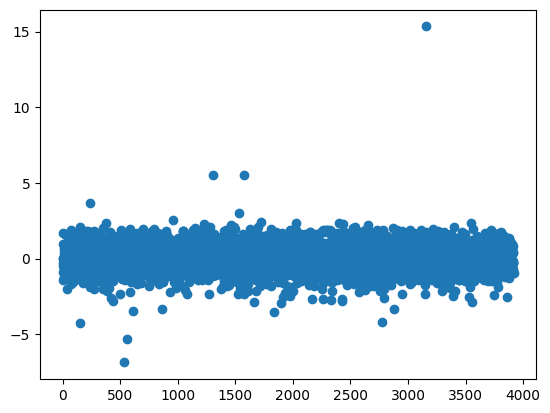

In [ ]:
import statsmodels.stats.api as sms
def independence(errors):
  est_dw = sms.durbin_watson(errors)
  if est_dw <= 1.5 and est_dw >= 2.5:
    print(f'los residuos presentan autocorrelación y el valor del estadistico de prueba es {est_dw}')
  else:
    print(f'Los residuos no presentan autocorrelación y el valor del estadistico de prueba es {est_dw}')
  plt.scatter(np.arange(len(errors)),errors)
  return est_dw

independence(error_pearson)

In [ ]:
from scipy import stats
stats.kstest(error_pearson)

TypeError: kstest() missing 1 required positional argument: 'cdf'

### Ejercicio No. 4 - Se tiene un conjunto de datos que registra la cantidad de anuncios publicitarios en redes sociales que realiza una empresa y su correspondiente retorno de inversión en ventas. Se desea determinar si existe una relación lineal significativa entre la cantidad de anuncios publicitarios y el retorno de inversión.

El conjunto de datos “publicidad.csv” consta de 200 observaciones y 4 variables que representan los gastos en publicidad (en miles de dólares) y las ventas (en miles de unidades) de un producto en un mercado específico:- TV: Gasto en publicidad en televisión.- Radio: Gasto en publicidad en radio.- Newspaper: Gasto en publicidad en periódicos.- Sales: Número de unidades vendidas (en miles)

In [ ]:
file_path = "/content/publicidad.csv"
df = pd.read_csv(file_path)
df

In [ ]:
df.columns

* Graficar el retorno de inversión (variable “Sales”) vs la cantidad de anuncios publicitarios por canal (“TV”, “Radio”, “Newspaper”). Para ello use la función scatter_matrix() del paquete pandas e interprete los graficos de las variables dos a dos, teniendo en cuenta que nuestra variable respuesta es “Sales”.

In [ ]:
df.describe()

In [ ]:
pd.plotting.scatter_matrix(df[['TV','Radio','Newspaper','Sales']], figsize=(12, 8))
plt.show()

De acuerdo a la grafica mostrada anteriormente se observa que las variable Tv y Radio tienen una relacion lineal positiva con gran nivel de correlación mas fuerte para el tv pues su dispersión de puntos es menor que la del radio, entre tanto se descarta fuerte correlación con la variable newspaper ya que muestra una relación lineal pero con mucha varianza.

* Calcular el coeficiente de correlación entre todas las variables y mediante un mapa de calor represente estas correlaciones. ¿Interprete las estructuras de dependencia encontradas?

In [ ]:
matriz = df[['Sales', 'TV', 'Radio', 'Newspaper']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

De acuerdo al mapa de calor se puede evidenciar que la variable dependiente"tv" tiene una correlación mayor  vs "Radio" y "Newpaper" lo cual garantiza una relación lineal mas fuerte.

* Teniedo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o “Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de regresión lineal simple y encuentra la ecuación de la recta. ¿Cuál es el valor del coeficiente de determinación R2? ¿Cómo se interpreta este valor?

Regresión lineal utilizando "TV" como variable predictora

In [ ]:
modelo = sm.OLS(df.Sales, sm.add_constant(df.TV))
resultado = modelo.fit()
print(resultado.summary())

Un R^2 se determina entre valores 0 y 1 el cual me explica el ajuste del modelo con base en los datos observados, es decir que el 62% (0.612) de la varianza de la variable dependiente (Ventas) puede explicarse por la variable independiente (Anuncios de "Tv").

In [ ]:
r2 = resultado.rsquared
print("Coeficiente de determinación R^2:", r2)

Ecuación de la Recta

In [ ]:
pendiente = 0.0475
intercepto = 7.0326

## y=mx+b

plt.scatter(df.TV, df.Sales)
plt.plot(df.TV, pendiente*df.TV + intercepto)

plt.xlabel('Gasto en TV')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [ ]:
5*pendiente + intercepto

### Ejercicio No. 5 - Se desea predecir la resistencia a la compresión del concreto (Concrete compressive strength) en función de diferentes variables predictoras como el cemento (Cement), la escoria (Slag), la ceniza volante (Fly ash), el agua (Water), el superplastificante (Superplasticizer), el agregado grueso (Coarse aggregate) y el agregado fino (Fine aggregate). Para ello se dispone de un conjunto de datos con 1030 observaciones. Se desea construir un modelo de regresión lineal múltiple para predecir la resistencia a la compresión del concreto en función de las variables predictoras.

Cargar los datos del archivo “Concrete_Data.xls” y examinar las características del con junto de datos.

In [ ]:
df = pd.read_excel (r'/content/Concrete_Data.xls', sheet_name ='Sheet1')
df.head()

* Realizar un análisis exploratorio de los datos para entender la relación entre las variables predictoras y la variable respuesta.

In [ ]:
# Se hace revisión de la estructura del dataset
df.info ()

In [ ]:
df.columns

In [ ]:
nuevos_nombres = ['Cement', 'Blast','Fly','Water','Superplasticizer','Coarse', 'Fine', 'Age', 'Concrete']
df.columns = nuevos_nombres

In [ ]:
valores_perdidos_por_columna = df.isnull().sum()
print(valores_perdidos_por_columna)

 ## No se encuentra valores Faltantes

In [ ]:
con_decimales = df.describe()
sin_decimales = con_decimales.round ()
print(sin_decimales)

In [ ]:
matriz = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

Se encuentra una correlación de mi variable predictoria 'Concrete compressive strength(MPa, megapascals) ' siendo las variables 'Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)' y 'Age (day)' las mas representativas vs mi variable predictoria

* Entrenar un modelo de regresión lineal múltiple utilizando el conjunto de datos y evalue si hay significancia en el modelo.

In [ ]:
# Dividir los datos en variables independientes (X) y variable dependiente (Y)
X = df[['Cement', 'Blast','Fly','Water','Superplasticizer','Coarse', 'Fine', 'Age']]  # Variables independientes
Y = df['Concrete'] #Variable dependiente

# Agregar el término constante para ajustar el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(Y, X)

# Ajustar el modelo
resultado = modelo.fit()

# Imprimir un resumen del modelo
print(resultado.summary())

Punto 2 - Se realiza el modelo de regresión lineal multiple evidenciando que se ncuentra significancia en el modelo ya que el P_Value del F-statistic: es < 0.005 , el modelo genera un P_value de 6.76e-206.

* Analizar la significancia estadística de las variables predictoras y construir un modelo de regresión lineal múltiple reducido con las variables significativas. Revise su desempeño con respecto al modelo completo revisando elAdj R2 y los criterios de información de Akaike y de Bayes(AICyBIC).

Se evalua la significancia de las variables predictorias del modelo tomado anteriormente y se eliminan cuya variable tienen el P-Value > 0.005, es decir Fine =0.060 y se ejecuta nuevamente para validar el nuevo calculo del P_Value de las variables independientes.

In [ ]:
# Dividir los datos en variables independientes (X) y variable dependiente (Y)
X = df
# Dividir los datos en variables independientes (X) y variable dependiente (Y)
X = df[['Cement', 'Blast','Fly','Water','Superplasticizer','Coarse','Age']]  # Variables independientes
Y = df['Concrete'] #Variable dependiente

# Agregar el término constante para ajustar el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(Y, X)

# Ajustar el modelo
resultado = modelo.fit()

# Imprimir un resumen del modelo
print(resultado.summary())  # Variables independientes
Y = df['Concrete'] #Variable dependiente


Se evalua la significancia de las variables predictorias del modelo nuevamente ejecutado y se eliminan cuya variable tienen el P-Value > 0.005, es decir Coarse =0.523 y se ejecuta nuevamente para validar el nuevo calculo del P_Value de las variables independientes.

In [ ]:
# Dividir los datos en variables independientes (X) y variable dependiente (Y)
X = df
# Dividir los datos en variables independientes (X) y variable dependiente (Y)
X = df[['Cement', 'Blast','Fly','Water','Superplasticizer','Age']]  # Variables independientes
Y = df['Concrete'] #Variable dependiente

# Agregar el término constante para ajustar el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(Y, X)

# Ajustar el modelo
resultado = modelo.fit()

# Imprimir un resumen del modelo
print(resultado.summary())  # Variables independientes
Y = df['Concrete'] #Variable dependiente

se evalua nuevamente el modelo y se determina las variables con significancia ya que todas tienen P - value < 0.05

Modelo 1 = Modelo Con todas las variables.
Modelo 2 = Modelo con variables significativas

La variación del coeficiente de determinación no varia entre mi modelo1  y 2 igual que el AIC que genera igual calidad del modelo y con un BIC menor en el modelo 2 me indica menor numero de variables lo cual lo hace el mas adecuado.

* Valide los supuestos del modelo iiidN(0 2) y en caso de no cumplir alguno, proponga una solución.Evalúe la conveniencia de usar un enfoque robusto en este caso

Media Cero: Se observan que el p_value > 0.05 No se rechaza la hipotesis. se evidencia que la mayoria los residuos estan centrados en 0

In [ ]:
null_hypothesis_mean = 0  # We expect residuals to be centered around 0 for a good model fit

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(resultado.resid, null_hypothesis_mean)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(resultado.resid, bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Media de la hipótesis nula')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.legend()
plt.grid(True)
plt.show()

Independencia: analizamos el Durbin- Watson que se encuentre entre 1.5 y 2.5 para garantizar independencia, sin embargo de acuerdo al modelo nos genera un valor de 1.2 lo cual nos da a entender que no hay independencia entre los errores.

In [ ]:
dw_statistic = sm.stats.stattools.durbin_watson(resultado.resid)
print("Durbin-Watson statistic:", dw_statistic)

Normalidad: No se rechaza a H0 si mi P-Value es >0.05, de acuerdo al prob(JB) (0.0745) me indica que hay normalidad.

In [ ]:
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(resultado.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Residuos')
plt.show()

Homocedasticidad: calculamos con breusch pagan en donde P- Value sea > a 0.05 no se rechaza H0 por lo tanto hay hommocedasticidad, sin embargo en el modelo se obtiene un P_Value (1.4915.....-27) lo cual me indica hay heterocedasticidad.

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ["lagrange multiplier statistic", "p-value", "f-value", "f p-value"]

bp_test = sms.het_breuschpagan(resultado.resid, resultado.model.exog)

lzip(names, bp_test)

In [ ]:
## Homocedasticidad
plt.figure(figsize=(15, 4))
plt.plot(resultado.resid, '.-', color="red", linewidth=0.4)
plt.show()